#Inicialização

In [ ]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 53.4 MB/s eta 0:00:00


In [ ]:
pip install pyodbc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 KB 9.8 MB/s eta 0:00:00


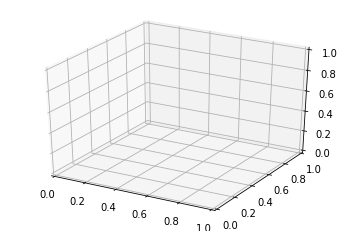

In [ ]:
import astropy.coordinates as coord
import astropy.coordinates as SkyCoord
import astropy.units as u
from scipy.stats import skew, kurtosis
from matplotlib.pyplot import cm
import pandas as pd
import io
from google.colab import files
from google.colab import drive
from astropy.io import fits
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier
from matplotlib import pyplot as plt
from matplotlib import quiver
import numpy as np
import os
import glob
import statistics
from astropy.table import Table
from scipy.spatial import Delaunay
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import scipy

ax = plt.figure().gca(projection='3d')

#Criando tabelas de Dados
Utilizando uma pesquisa na linguagem SQL para criar tabela de dados baixados do catálogo do gaia DR3.

Rodando perfeitamente gerando os dados em um range de l = 0,360 e b = -90,90


### Análise estatística dos dados começa aqui.
O código abaixo serve para gerar dados estatísticos de acordo com as posições em latitude e longitude galáctica. No momento os dados gerados são Skewness e Kurtosis. Aqui se obtém o código de conversão de movimento próprio em ascenção reta e declinação para movimento próprio de latitude e longitude galácticas.


In [ ]:
from numpy.core.fromnumeric import mean
tabela = np.empty([1,8])
t=100
for l in range(0, 370, 10):
  for b in range(-90, 100, 10):
    while l in range(0, 370, 10):
      string=("SELECT TOP 100000 pm, ra, dec, pmdec, pmra, l, b, parallax, parallax_over_error, \
  ((1/cos(b*3.141592654/180))*(-pmra*cos(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)*sin(ra-192.85833333*3.141592654/180)+pmdec*(sin(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)-cos(27.12833333*3.141592654/180)*sin(dec*3.141592654/180)*cos(ra-192.85833333*3.141592654/180)) )) as pmb, \
  (1/(cos(b*3.141592654/180)*cos(l*3.141592654/180-122.93193212*3.141592654/180)))*( sin(dec*3.141592654/180)*sin(ra-192.85833333*3.141592654/180)*pmdec - cos(dec*3.141592654/180)*cos(ra-192.85833333*3.141592654/180)*pmra +sin(b*3.141592654/180)*sin(l*3.141592654/180-122.93193212*3.141592654/180)*(1/cos(b*3.141592654/180))*( -pmra*cos(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)*sin(ra-192.85833333*3.141592654/180)+pmdec*(sin(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)-cos(27.12833333*3.141592654/180)*sin(dec*3.141592654/180)*cos(ra-192.85833333*3.141592654/180)) ) ) as pml \
  FROM gaiadr3.gaia_source \
    WHERE parallax > 10 \
        AND parallax_over_error > 10 \
        AND pm < 1000 \
        AND pmdec IS NOT NULL \
        AND pmra IS NOT NULL \
        AND 1=CONTAINS(POINT(l, b), \
                    CIRCLE(%s, %d, 10 ))" % ( l, b))
      name = "%s-%d.csv" % ( l, b)
      namescsv = "%s-%d" % ( l, b)
      vect = [l,b]
      print(vect)
      r1 = Gaia.launch_job(string,output_file=name,dump_to_file=True, output_format='csv') ## Para que baixe arquivos csv basta mudar de False para True.
      r1.get_results()
      table1 = r1.results
      if l <= 360:
        break
    vetorresskew = ((skew(table1['pml']))**2 + (skew(table1['pmb']))**2)**(1/2)
    tabela_aux = np.array([(l,b, skew(table1['pml']), skew(table1['pmb']),kurtosis(table1['pml']),kurtosis(table1['pmb']), vetorresskew, len(table1))])
    tabela = np.append(tabela, tabela_aux, axis = 0) # O problema é que quando transformo para dataframe, ele lê como um coluna apenas.

[0, -90]
[0, -80]
[0, -70]
[0, -60]
[0, -50]
[0, -40]
[0, -30]
[0, -20]
[0, -10]
[0, 0]
[0, 10]
[0, 20]
[0, 30]
[0, 40]
[0, 50]
[0, 60]
[0, 70]
[0, 80]
[0, 90]
[10, -90]
[10, -80]
[10, -70]
[10, -60]
[10, -50]
[10, -40]
[10, -30]
[10, -20]
[10, -10]
[10, 0]
[10, 10]
[10, 20]
[10, 30]
[10, 40]
[10, 50]
[10, 60]
[10, 70]
[10, 80]
[10, 90]
[20, -90]
[20, -80]
[20, -70]
[20, -60]
[20, -50]
[20, -40]
[20, -30]
[20, -20]
[20, -10]
[20, 0]
[20, 10]
[20, 20]
[20, 30]
[20, 40]
[20, 50]
[20, 60]
[20, 70]
[20, 80]
[20, 90]
[30, -90]
[30, -80]
[30, -70]
[30, -60]
[30, -50]
[30, -40]
[30, -30]
[30, -20]
[30, -10]
[30, 0]
[30, 10]
[30, 20]
[30, 30]
[30, 40]
[30, 50]
[30, 60]
[30, 70]
[30, 80]
[30, 90]
[40, -90]
[40, -80]
[40, -70]
[40, -60]
[40, -50]
[40, -40]
[40, -30]
[40, -20]
[40, -10]
[40, 0]
[40, 10]
[40, 20]
[40, 30]
[40, 40]
[40, 50]
[40, 60]
[40, 70]
[40, 80]
[40, 90]
[50, -90]
[50, -80]
[50, -70]
[50, -60]
[50, -50]
[50, -40]
[50, -30]
[50, -20]
[50, -10]
[50, 0]
[50, 10]
[50, 20]
[50, 30]

KeyboardInterrupt: ignored

# Tabela que gera os dados apresentados

A tabela abaixo serve para realizar dados estatísticos e de formato FITS através da média dos apontamentos de 10 em 10 graus, com correção de erro na paralaxe para que os erros sejam menores do que 1, onde os movimentos próprios em ascenção reta e declinação devem existir. O círculo do cone de pesquisa tem 10 graus de raio e a distância tem uma paralaxe acima de 10, que garante que trabalhemos com os dados da vizinhança solar.


In [ ]:
from numpy.core.fromnumeric import mean
tabela = np.empty([1,9])
matrixfinal = np.empty([37,19])
for l in range(0, 370, 10):
  for b in range(-90, 100, 10):
    while l in range(0, 370, 10):
      string=("SELECT TOP 300000 pm, ra, dec, pmdec, pmra, l, b, parallax, parallax_over_error \
  FROM gaiadr3.gaia_source \
    WHERE parallax > 10 \
        AND parallax_over_error > 10 \
        AND pmdec IS NOT NULL \
        AND pmra IS NOT NULL \
        AND 1=CONTAINS(POINT(l, b), \
                    CIRCLE(%s, %d, 10 ))" % ( l, b))
      name = "%s-%d.csv" % ( l, b)
      namescsv = "%s-%d" % ( l, b)
      vect = [l,b]
      print(vect)
      r1 = Gaia.launch_job(string,output_file=name,dump_to_file=True, output_format='csv') ## Para que baixe arquivos csv basta mudar de False para True.
      r1.get_results()
      table1 = r1.results
      if l <= 360:
        break
    vetorresskew = ((skew(table1['pmra']))**2 + (skew(table1['pmdec']))**2)**(1/2)
    modulomedia = ((scipy.mean(table1['pmra']))**2+(scipy.mean(table1['pmdec']))**2)**(1/2)
    i = l/10
    j = (90-b)/10
    int_i = int(i)
    int_j = int(j)
    print(int_i)
    print(int_j)
    matrixfinal[int_i,int_j] = np.matrix(modulomedia)
    tabela_aux = np.array([(l,b, scipy.mean(table1['pmra']), scipy.mean(table1['pmdec']), skew(table1['pmra']), skew(table1['pmdec']), vetorresskew, modulomedia, len(table1))])
    tabela = np.append(tabela, tabela_aux, axis = 0)

[0, -90]


<ipython-input-5-b2e854c9c63f>:25: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  modulomedia = ((scipy.mean(table1['pmra']))**2+(scipy.mean(table1['pmdec']))**2)**(1/2)
<ipython-input-5-b2e854c9c63f>:33: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  tabela_aux = np.array([(l,b, scipy.mean(table1['pmra']), scipy.mean(table1['pmdec']), skew(table1['pmra']), skew(table1['pmdec']), vetorresskew, modulomedia, len(table1))])


0
18
[0, -80]
0
17
[0, -70]
0
16
[0, -60]
0
15
[0, -50]
0
14
[0, -40]
0
13
[0, -30]
0
12
[0, -20]
0
11
[0, -10]
0
10
[0, 0]
0
9
[0, 10]
0
8
[0, 20]
0
7
[0, 30]
0
6
[0, 40]
0
5
[0, 50]
0
4
[0, 60]
0
3
[0, 70]
0
2
[0, 80]
0
1
[0, 90]
0
0
[10, -90]
1
18
[10, -80]
1
17
[10, -70]
1
16
[10, -60]
1
15
[10, -50]
1
14
[10, -40]
1
13
[10, -30]
1
12
[10, -20]
1
11
[10, -10]
1
10
[10, 0]
1
9
[10, 10]
1
8
[10, 20]
1
7
[10, 30]
1
6
[10, 40]
1
5
[10, 50]
1
4
[10, 60]
1
3
[10, 70]
1
2
[10, 80]
1
1
[10, 90]
1
0
[20, -90]
2
18
[20, -80]
2
17
[20, -70]
2
16
[20, -60]
2
15
[20, -50]
2
14
[20, -40]
2
13
[20, -30]
2
12
[20, -20]
2
11
[20, -10]
2
10
[20, 0]
2
9
[20, 10]
2
8
[20, 20]
2
7
[20, 30]
2
6
[20, 40]
2
5
[20, 50]
2
4
[20, 60]
2
3
[20, 70]
2
2
[20, 80]
2
1
[20, 90]
2
0
[30, -90]
3
18
[30, -80]
3
17
[30, -70]
3
16
[30, -60]
3
15
[30, -50]
3
14
[30, -40]
3
13
[30, -30]
3
12
[30, -20]
3
11
[30, -10]
3
10
[30, 0]
3
9
[30, 10]
3
8
[30, 20]
3
7
[30, 30]
3
6
[30, 40]
3
5
[30, 50]
3
4
[30, 60]
3
3
[30, 70]
3


Verificando se está tudo certo com a tabela gerada.

In [ ]:
matrixtransVR = matrixfinal.T

In [ ]:
hdu = fits.PrimaryHDU(matrixtransVR)

In [ ]:
hdu.writeto('matrixttrans(mapa inteiro só que usando pmra e pmdec código Rama).fits')

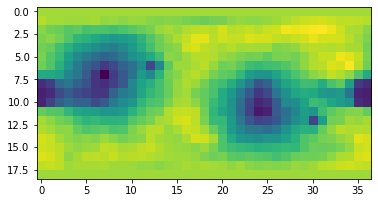

In [ ]:
plt.imshow(matrixtransVR)

In [ ]:
!zip -r /content/dados.zip /content # Zipar todos os resultados baixados.

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 23%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2023.01.09/ (stored 0%)
  adding: content/.config/logs/2023.01.09/14.34.57.728355.log (deflated 53%)
  adding: content/.config/logs/2023.01.09/14.36.13.391200.log (deflated 54%)
  adding: content/.config/logs/2023.01.09/14.35.41.921526.log (deflated 53%)
  adding: content/.config/logs/2023.01.09/14.34.27.508072.log (deflated 91%)
  adding: content/.config/logs/2023.01.09/14.35.26.879372.l

In [ ]:
tabela

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00, -9.00000000e+01,  6.44296330e+01, ...,
         4.24060716e+00,  7.99550441e+01,  2.18600000e+03],
       [ 0.00000000e+00, -8.00000000e+01,  6.50545456e+01, ...,
         1.55341225e+01,  8.44628001e+01,  2.19700000e+03],
       ...,
       [ 3.60000000e+02,  7.00000000e+01, -6.22575832e+01, ...,
         3.71528001e+00,  7.67911276e+01,  2.22100000e+03],
       [ 3.60000000e+02,  8.00000000e+01, -7.05940546e+01, ...,
         4.61948034e+00,  8.32209233e+01,  2.20200000e+03],
       [ 3.60000000e+02,  9.00000000e+01, -6.89706505e+01, ...,
         3.07986904e+00,  8.06955029e+01,  2.35600000e+03]])

Transformando em dataframe

In [ ]:
table1

pm,ra,dec,pmdec,pmra,l,b,parallax,parallax_over_error
float64,float64,float64,float64,float64,float64,float64,float64,float64
25.654705,188.43080367380918,28.63300714825729,-6.6701607802291525,24.772421160926804,190.8795341195655,85.80652958930514,10.740689696579947,237.65353
178.06587,188.34528426037392,28.699285198814692,-69.22966704773886,-164.05702576991848,190.38879161269273,85.71321816904938,14.052574205591137,187.16718
126.3872,187.90312660217396,28.71187084263457,-126.18493200993242,-7.1475501417869625,191.90271792133908,85.3435530701808,18.23359895908359,1131.2693
14.639013,187.33489229905072,28.43431844829269,-8.260485241293622,-12.085739173785107,196.69442905399947,84.94130923552034,11.098582802383646,203.36404
15.423278,187.1148483370905,28.562211933040306,-8.456349675151223,-12.898358086586953,195.83761839055495,84.72267852120325,11.63227029591835,187.96132
104.40728,187.73289317782897,29.065704424264915,-83.0463895762666,63.278572668222075,188.54793528425856,85.08070792712059,10.257731141850972,235.58366
204.96114,188.86804861312834,29.210438784486545,-203.91211506270574,-20.710289561527496,181.38576252861708,85.91185815862379,13.125349246713839,612.0791
166.50838,188.5603283499437,29.32804391967544,-66.77153230345556,152.53393384024426,181.78203187711378,85.6202541720028,17.10470303959119,819.71295
12.379078,187.96058999571986,29.314114665982913,-5.990169113276165,-10.833256700028482,184.93109012225557,85.16224462999965,12.069768567387452,520.6354


In [ ]:
tabeladf = pd.DataFrame(tabela, columns =['l', 'b','media mu_l', 'media mu_b', 'Skewness mu_l', 'Skewness mu_b', 'Vetor Resultante Skewness' ,'modulo media', 'Quantidade de estrelas'] )

In [ ]:
tabeladf.drop(0, inplace = True)


In [ ]:
tabeladf

,l,b,media mu_l,media mu_b,Skewness mu_l,Skewness mu_b,Vetor Resultante Skewness,modulo media,Quantidade de estrelas
1,0.0,-90.0,64.429633,-47.345871,2.499898,-3.425384,4.240607,79.955044,2186.0
2,0.0,-80.0,65.054546,-53.869014,14.382534,-5.869554,15.534123,84.462800,2197.0
3,0.0,-70.0,67.674075,-56.943889,18.528305,-4.697075,19.114409,88.444259,2241.0
4,0.0,-60.0,60.248562,-62.444124,20.179510,-1.112156,20.210134,86.770720,2257.0
5,0.0,-50.0,46.750166,-73.767559,-4.910282,-3.372735,5.957030,87.334018,2371.0
...,...,...,...,...,...,...,...,...,...
699,360.0,50.0,-57.877395,-45.740488,-2.424000,-1.672171,2.944814,73.769811,2226.0
700,360.0,60.0,-61.156986,-43.736566,-2.384607,-0.476869,2.431821,75.186862,2178.0
701,360.0,70.0,-62.257583,-44.954094,-0.928842,-3.597299,3.715280,76.791128,2221.0
702,360.0,80.0,-70.594055,-44.070416,-1.097246,-4.487276,4.619480,83.220923,2202.0


# Plotando o mapa cartesiano de l = 0 a 360º e b = -90º a 90º

Text(0, 0.5, 'Latitude Galáctica (b)')

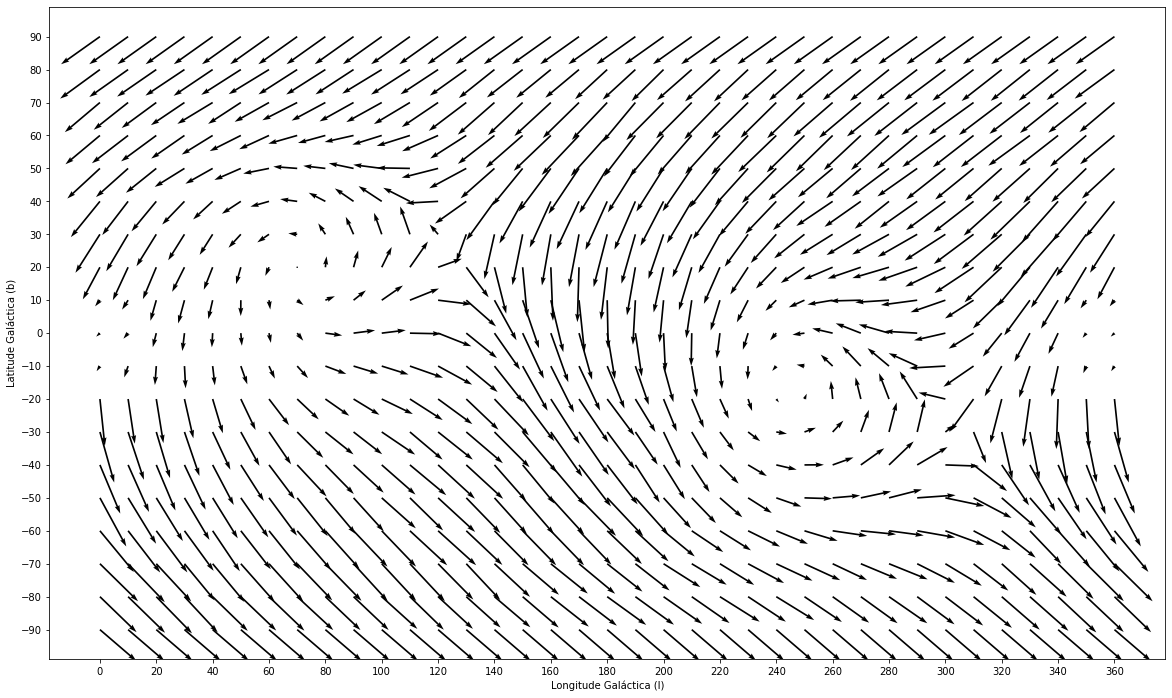

In [ ]:
plt.figure(figsize=(20.0, 12.0))
plt.quiver(tabeladf['l'], tabeladf['b'],tabeladf['media mu_l'],tabeladf['media mu_b'],width = 0.0015, angles='xy',scale_units='xy', scale=5)
plt.xticks(np.arange(0, 380, 20))
plt.yticks(np.arange(-90, 100, 10)) 
plt.xlabel('Longitude Galáctica (l)')
plt.ylabel('Latitude Galáctica (b)')

# Plotando o mapa cartesiano de l = -180º a 180º e b = -90º a 90º

In [ ]:
tabeladfmaior180 = tabeladf.query("l>180")
tabeladfmenor180 = tabeladf.query("l=<180")

In [ ]:
tabelaparte1 = tabeladfmaior180['l'] -180
tabelaparte1

362     10.0
363     10.0
364     10.0
365     10.0
366     10.0
       ...  
699    180.0
700    180.0
701    180.0
702    180.0
703    180.0
Name: l, Length: 342, dtype: float64

In [ ]:
tabelaparte2 = tabeladfmenor180['l']*(-1) +180

In [ ]:
tabelaparte2

1      180.0
2      180.0
3      180.0
4      180.0
5      180.0
       ...  
357      0.0
358      0.0
359      0.0
360      0.0
361      0.0
Name: l, Length: 361, dtype: float64

In [ ]:
tabelapp2 = tabelaparte2*-1

In [ ]:
tabelapp1 = tabelaparte1

In [ ]:
tabelafinall = pd.concat([tabelapp1, tabelapp2], ignore_index=True)

In [ ]:
tabelafinall

0      10.0
1      10.0
2      10.0
3      10.0
4      10.0
       ... 
698    -0.0
699    -0.0
700    -0.0
701    -0.0
702    -0.0
Name: l, Length: 703, dtype: float64

In [ ]:
nepossivel = tabelafinall*(-1)

In [ ]:
nepossivel

0     -10.0
1     -10.0
2     -10.0
3     -10.0
4     -10.0
       ... 
698     0.0
699     0.0
700     0.0
701     0.0
702     0.0
Name: l, Length: 703, dtype: float64

In [ ]:
tabeladf.to_csv('Tabela com todos os valores.csv')

Plotando o gráfico de quiver, utilizando as coordenadas l e b para posição e skewness de movimento próprio para as direções.

Text(0, 0.5, 'Latitude Galáctica (b)')

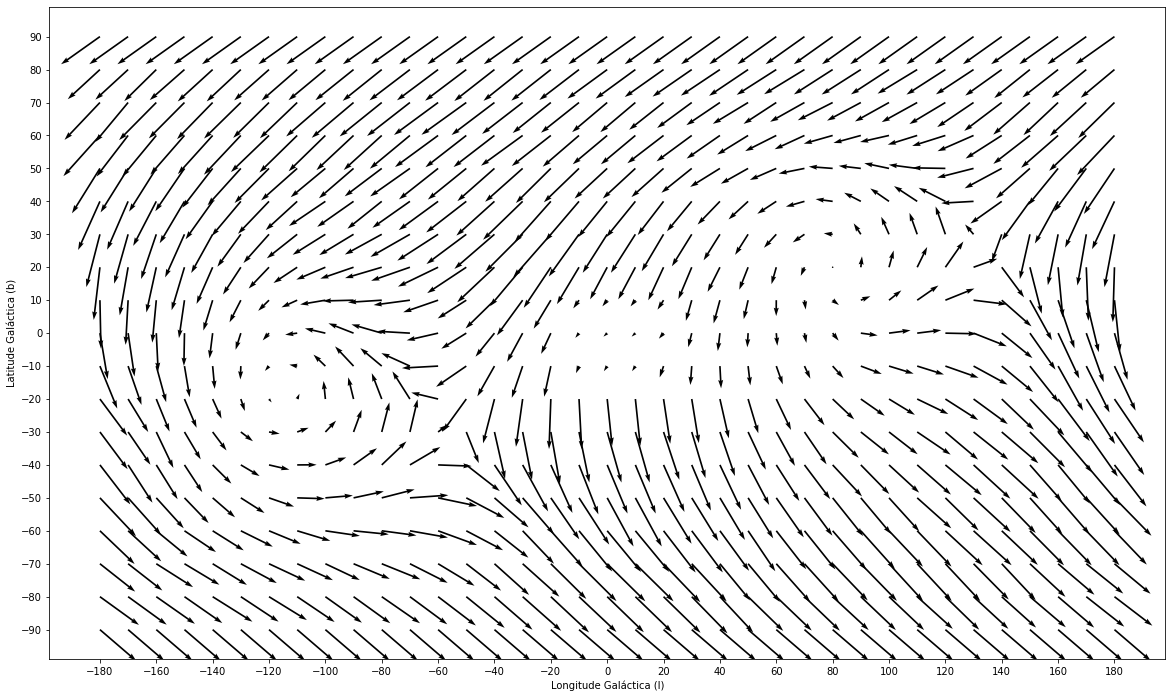

In [ ]:
plt.figure(figsize=(20.0, 12.0))
plt.quiver(tabelafinall, tabeladf['b'],tabeladf['media mu_l'],tabeladf['media mu_b'],width = 0.0015, angles='xy',scale_units='xy', scale=5)
plt.xticks(np.arange(-180, 200, 20))
plt.yticks(np.arange(-90, 100, 10)) 
plt.xlabel('Longitude Galáctica (l)')
plt.ylabel('Latitude Galáctica (b)')

# Região em torno do ápex l = 50º até 80º e b = 0º até 30º

In [ ]:
from numpy.core.fromnumeric import mean
tabela2 = np.empty([1,9])
matrixfinal2 = np.empty([31,31])
for l in range(50, 81, 1):
  for b in range(0, 31, 1):
    while l in range(50, 81, 1):
      string=("SELECT TOP 300000 pm, ra, dec, pmdec, pmra, l, b, parallax, parallax_over_error \
  FROM gaiadr3.gaia_source \
    WHERE parallax > 10 \
        AND parallax_over_error > 10 \
        AND pmdec IS NOT NULL \
        AND pmra IS NOT NULL \
        AND 1=CONTAINS(POINT(l, b), \
                    CIRCLE(%s, %d, 10 ))" % ( l, b))
      name = "Apex %s-%d.csv" % ( l, b)
      namescsv = "Apex %s-%d" % ( l, b)
      vect = [l,b]
      print(vect)
      r2 = Gaia.launch_job(string,output_file=name,dump_to_file=True, output_format='csv') ## Para que baixe arquivos csv basta mudar de False para True.
      r2.get_results()
      table2 = r2.results
      if l <= 80:
        break
    vetorresskew2 = ((skew(table2['pmra']))**2 + (skew(table2['pmdec']))**2)**(1/2)
    modulomedia2 = ((scipy.mean(table2['pmra']))**2+(scipy.mean(table2['pmdec']))**2)**(1/2)
    x = (l-50)
    y = (b-0)
    int_x = int(x)
    int_y = int(y)
    print(int_x)
    print(int_y)
    matrixfinal2[int_x,int_y] = np.matrix(modulomedia2)
    tabela_aux2 = np.array([(l,b, scipy.mean(table2['pmra']), scipy.mean(table2['pmdec']), skew(table2['pmra']), skew(table2['pmdec']), vetorresskew2, modulomedia2, len(table2))])
    tabela2 = np.append(tabela2, tabela_aux2, axis = 0)

[50, 0]


<ipython-input-187-ab04ecc2c60e>:25: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  modulomedia2 = ((scipy.mean(table2['pmra']))**2+(scipy.mean(table2['pmdec']))**2)**(1/2)
<ipython-input-187-ab04ecc2c60e>:33: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  tabela_aux2 = np.array([(l,b, scipy.mean(table2['pmra']), scipy.mean(table2['pmdec']), skew(table2['pmra']), skew(table2['pmdec']), vetorresskew2, modulomedia2, len(table2))])


0
0
[50, 1]
0
1
[50, 2]
0
2
[50, 3]
0
3
[50, 4]
0
4
[50, 5]
0
5
[50, 6]
0
6
[50, 7]
0
7
[50, 8]
0
8
[50, 9]
0
9
[50, 10]
0
10
[50, 11]
0
11
[50, 12]
0
12
[50, 13]
0
13
[50, 14]
0
14
[50, 15]
0
15
[50, 16]
0
16
[50, 17]
0
17
[50, 18]
0
18
[50, 19]
0
19
[50, 20]
0
20
[50, 21]
0
21
[50, 22]
0
22
[50, 23]
0
23
[50, 24]
0
24
[50, 25]
0
25
[50, 26]
0
26
[50, 27]
0
27
[50, 28]
0
28
[50, 29]
0
29
[51, 0]
1
0
[51, 1]
1
1
[51, 2]
1
2
[51, 3]
1
3
[51, 4]
1
4
[51, 5]
1
5
[51, 6]
1
6
[51, 7]
1
7
[51, 8]
1
8
[51, 9]
1
9
[51, 10]
1
10
[51, 11]
1
11
[51, 12]
1
12
[51, 13]
1
13
[51, 14]
1
14
[51, 15]
1
15
[51, 16]
1
16
[51, 17]
1
17
[51, 18]
1
18
[51, 19]
1
19
[51, 20]
1
20
[51, 21]
1
21
[51, 22]
1
22
[51, 23]
1
23
[51, 24]
1
24
[51, 25]
1
25
[51, 26]
1
26
[51, 27]
1
27
[51, 28]
1
28
[51, 29]
1
29
[52, 0]
2
0
[52, 1]
2
1
[52, 2]
2
2
[52, 3]
2
3
[52, 4]
2
4
[52, 5]
2
5
[52, 6]
2
6
[52, 7]
2
7
[52, 8]
2
8
[52, 9]
2
9
[52, 10]
2
10
[52, 11]
2
11
[52, 12]
2
12
[52, 13]
2
13
[52, 14]
2
14
[52, 15]
2
15
[52,

In [ ]:
matrixttrans2 = matrixfinal2.T

In [ ]:
hdu2 = fits.PrimaryHDU(matrixttrans2)

In [ ]:
hdu2.writeto('matrixttransp ápex 10 em 10 graus na região.fits')

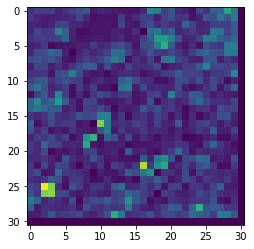

In [ ]:
plt.imshow(matrixttrans2)

In [ ]:
tabela2

array([[ 5.10000000e+01,  7.00000000e+00,  9.76173475e-01, ...,
         2.88586362e+00,  1.97980109e+01,  4.49100000e+03],
       [ 5.00000000e+01,  0.00000000e+00,  3.49674371e+00, ...,
         5.07135252e-01,  2.47398748e+01,  4.50000000e+01],
       [ 5.00000000e+01,  1.00000000e+00, -2.09098746e+00, ...,
         4.22128457e+00,  2.87055544e+01,  6.30000000e+01],
       ...,
       [ 7.90000000e+01,  2.70000000e+01, -2.49533747e+01, ...,
         6.92724036e-01,  2.51717472e+01,  2.80000000e+01],
       [ 7.90000000e+01,  2.80000000e+01, -1.64713910e+01, ...,
         3.33130843e-01,  2.89436625e+01,  2.80000000e+01],
       [ 7.90000000e+01,  2.90000000e+01, -2.15439204e+01, ...,
         2.76572377e+00,  4.62256752e+01,  2.60000000e+01]])

In [ ]:
tabeladf2 = pd.DataFrame(tabela2, columns =['l', 'b','media mu_ra','media mu_dec', 'Skewness mu_ra', 'Skewness mu_dec', 'Vetor resultante Skewness pml e pmb','modulo da media', 'Quantidade de estrelas'] )

In [ ]:
tabeladf2.drop(0, inplace = True)


In [ ]:
tabeladf2.to_csv('ápex solar.csv')

Text(0, 0.5, 'Latitude Galáctica (b)')

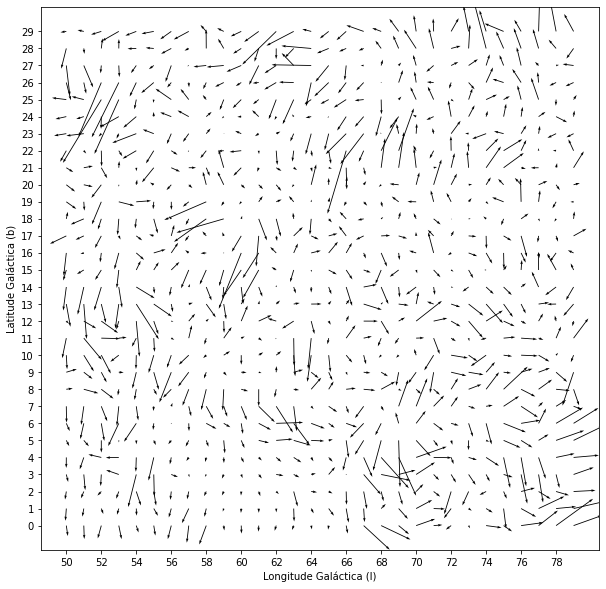

In [ ]:
plt.figure(figsize=(10.0, 10.0))
plt.quiver(tabeladf2['l'], tabeladf2['b'],tabeladf2['media mu_ra'],tabeladf2['media mu_dec'],width = 0.0015, angles='xy',scale_units='xy', scale=40)
plt.xticks(np.arange(50, 82, 2))
plt.yticks(np.arange(0, 31, 1))
plt.xlabel('Longitude Galáctica (l)')
plt.ylabel('Latitude Galáctica (b)')

# Região em torno do ante-ápex l = 230º até 260º e b = -30º até 0º

In [ ]:
from numpy.core.fromnumeric import mean
tabela3 = np.empty([1,9])
matrixfinal3 = np.empty([31,31])
for l in range(230, 261, 1):
  for b in range(-30, 1, 1):
    while l in range(230, 261, 1):
      string=("SELECT TOP 300000 pm, ra, dec, pmdec, pmra, l, b, parallax, parallax_over_error \
  FROM gaiadr3.gaia_source \
    WHERE parallax > 10 \
        AND parallax_over_error > 10 \
        AND pmdec IS NOT NULL \
        AND pmra IS NOT NULL \
        AND 1=CONTAINS(POINT(l, b), \
                    CIRCLE(%s, %d, 10 ))" % ( l, b))
      name = "Ante-Apex %s-%d.csv" % ( l, b)
      namescsv = "Ante-Apex %s-%d" % ( l, b)
      vect = [l,b]
      print(vect)
      r3 = Gaia.launch_job(string,output_file=name,dump_to_file=True, output_format='csv') ## Para que baixe arquivos csv basta mudar de False para True.
      r3.get_results()
      table3 = r3.results
      if l <= 260:
        break
    vetorresskew3 = ((skew(table3['pmra']))**2 + (skew(table3['pmdec']))**2)**(1/2)
    modulomedia3 = ((scipy.mean(table3['pmra']))**2+(scipy.mean(table3['pmdec']))**2)**(1/2)
    x2 = (l-230)
    y2 = (b+30)
    int_x2 = int(x2)
    int_y2 = int(y2)
    print(int_x2)
    print(int_y2)
    matrixfinal3[int_x2,int_y2] = np.matrix(modulomedia3)
    tabela_aux3 = np.array([(l,b, scipy.mean(table3['pmra']), scipy.mean(table3['pmdec']), skew(table3['pmra']), skew(table3['pmdec']), vetorresskew3, modulomedia3, len(table3))])
    tabela3 = np.append(tabela3, tabela_aux3, axis = 0)

[230, -30]


<ipython-input-201-38767d6d37e5>:25: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  modulomedia3 = ((scipy.mean(table3['pmra']))**2+(scipy.mean(table3['pmdec']))**2)**(1/2)
<ipython-input-201-38767d6d37e5>:33: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  tabela_aux3 = np.array([(l,b, scipy.mean(table3['pmra']), scipy.mean(table3['pmdec']), skew(table3['pmra']), skew(table3['pmdec']), vetorresskew3, modulomedia3, len(table3))])


0
0
[230, -29]
0
1
[230, -28]
0
2
[230, -27]
0
3
[230, -26]
0
4
[230, -25]
0
5
[230, -24]
0
6
[230, -23]
0
7
[230, -22]
0
8
[230, -21]
0
9
[230, -20]
0
10
[230, -19]
0
11
[230, -18]
0
12
[230, -17]
0
13
[230, -16]
0
14
[230, -15]
0
15
[230, -14]
0
16
[230, -13]
0
17
[230, -12]
0
18
[230, -11]
0
19
[230, -10]
0
20
[230, -9]
0
21
[230, -8]
0
22
[230, -7]
0
23
[230, -6]
0
24
[230, -5]
0
25
[230, -4]
0
26
[230, -3]
0
27
[230, -2]
0
28
[230, -1]
0
29
[230, 0]
0
30
[231, -30]
1
0
[231, -29]
1
1
[231, -28]
1
2
[231, -27]
1
3
[231, -26]
1
4
[231, -25]
1
5
[231, -24]
1
6
[231, -23]
1
7
[231, -22]
1
8
[231, -21]
1
9
[231, -20]
1
10
[231, -19]
1
11
[231, -18]
1
12
[231, -17]
1
13
[231, -16]
1
14
[231, -15]
1
15
[231, -14]
1
16
[231, -13]
1
17
[231, -12]
1
18
[231, -11]
1
19
[231, -10]
1
20
[231, -9]
1
21
[231, -8]
1
22
[231, -7]
1
23
[231, -6]
1
24
[231, -5]
1
25
[231, -4]
1
26
[231, -3]
1
27
[231, -2]
1
28
[231, -1]
1
29
[231, 0]
1
30
[232, -30]
2
0
[232, -29]
2
1
[232, -28]
2
2
[232, -27]
2
3
[

In [ ]:
matrixttrans3 = matrixfinal3.T

In [ ]:
hdu3 = fits.PrimaryHDU(matrixttrans3)

In [ ]:
hdu3.writeto('matrixttransp ante-ápex 10 em 10 graus na região.fits')

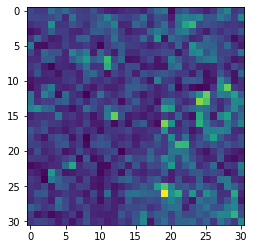

In [ ]:
plt.imshow(matrixttrans3)

In [ ]:
tabela3

array([[ 0.00000000e+00, -9.00000000e+00, -4.57986692e+00, ...,
         2.81203054e+00,  3.68220864e+01,  5.10000000e+01],
       [ 2.30000000e+02, -3.00000000e+01,  1.88103719e+01, ...,
         1.11760239e+00,  2.97658526e+01,  2.60000000e+01],
       [ 2.30000000e+02, -2.90000000e+01,  3.03531053e+01, ...,
         9.70235203e-01,  3.03531676e+01,  2.50000000e+01],
       ...,
       [ 2.60000000e+02, -2.00000000e+00, -1.67283976e+01, ...,
         7.65857208e-01,  2.74652319e+01,  1.10000000e+01],
       [ 2.60000000e+02, -1.00000000e+00, -3.31660030e+01, ...,
         2.26242765e-01,  3.33158701e+01,  2.30000000e+01],
       [ 2.60000000e+02,  0.00000000e+00, -5.90791774e+01, ...,
         7.92941731e-01,  6.43392998e+01,  3.10000000e+01]])

In [ ]:
tabeladf3 = pd.DataFrame(tabela3, columns =['l', 'b','media mu_ra','media mu_dec', 'Skewness mu_ra', 'Skewness mu_dec', 'Vetor resultante Skewness pml e pmb','modulo da media', 'Quantidade de estrelas'] )

In [ ]:
tabeladf3.drop(0, inplace = True)


In [ ]:
tabeladf3.to_csv('ante-ápex solar.csv')

Text(0, 0.5, 'Latitude Galáctica (b)')

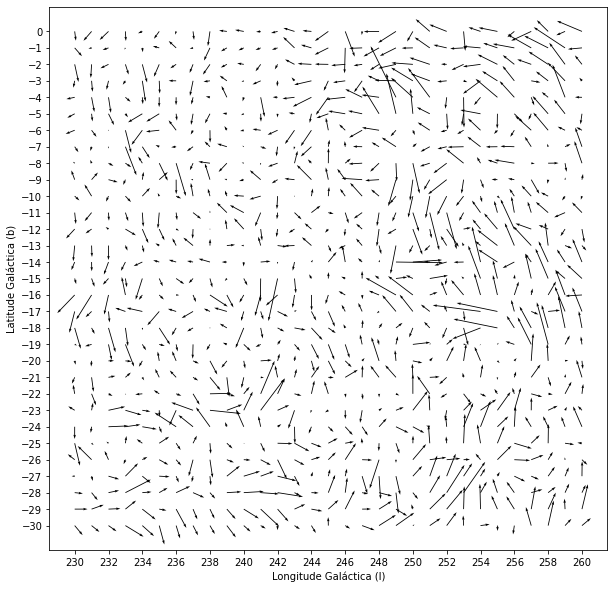

In [ ]:
plt.figure(figsize=(10.0, 10.0))
plt.quiver(tabeladf3['l'], tabeladf3['b'],tabeladf3['media mu_ra'],tabeladf3['media mu_dec'],width = 0.0015, angles='xy',scale_units='xy', scale=40)
plt.xticks(np.arange(230, 262, 2))
plt.yticks(np.arange(-30, 1, 1))
plt.xlabel('Longitude Galáctica (l)')
plt.ylabel('Latitude Galáctica (b)')